In [2]:
%cd ..

/Users/gkalstn/capstone


In [3]:

import numpy as np
import cordinate.edge_detect as ed
import cordinate.point_order as po
#import sys
#import os
#import tensorflow.compat.v1 as tf
import cv2
from PIL import Image
import object_detection.cut_obj as co
import trans.imgwarp2 as iw
import trans.show_result as sr


In [61]:

import time

image_path = './test_images/img2.jpeg'

'''
img_cut_part
'''
img_cut_time = time.time()
result_dict = co.img_cut(image_path)
image_np = result_dict['image_np']
points = result_dict['points']
print("img_cut_time :", time.time() - img_cut_time)

img_cut_time : 5.622473239898682


In [62]:

import cv2
import numpy as np
import numpy.linalg as lin

In [63]:
image_np.shape

(521, 373, 3)

In [64]:
    h, w = image_np[:,:,0].shape
    
    if (h > 1000) or (w > 1000) :
        h, w = int(h/3), int(w/3)
        image_np = cv2.resize(image_np, dsize=(w, h), interpolation=cv2.INTER_AREA)

    no_background = np.zeros((h, w))

    for i in range(h) :
        for j in range(w) :
            if (image_np[i,j,0] < image_np[i,j,1]) and (image_np[i,j,1] < image_np[i,j,2] and (image_np[i,j,0]<=44)) and (image_np[i,j,2]>170):
                no_background[i, j] = image_np[i, j, 0]

        
   

    for i in range(h) :
        for j in range(w) :
            if no_background[i, j] != 0 :
                no_background[i, j] = 200



    w_list = np.linspace(0, w-1, 17)
    h_list = np.linspace(0, h-1, 17)


    right = []
    left = []


In [21]:
w_list

array([  0.  ,  23.25,  46.5 ,  69.75,  93.  , 116.25, 139.5 , 162.75,
       186.  , 209.25, 232.5 , 255.75, 279.  , 302.25, 325.5 , 348.75,
       372.  ])

In [8]:


def getcos(combination_list) :
    v1 = combination_list[1] - combination_list[0]
    v2 = combination_list[2] - combination_list[0]
    cos = np.dot(v1, v2) / (np.linalg.norm(v1, ord=2)*np.linalg.norm(v2, ord=2))
    
    return abs(cos)

def test_line_num(point_lists) :
    for i in range(len(point_lists)-3) :
        if getcos(np.array(point_lists[i:i+3])) < 0.999 :
            print('detected 2 lines')
            return i
            
    
    print('detected 1 lines')
    return 0


def equation(point_list1, point_list2) :
    x11 = point_list1[0][0]
    y11 = point_list1[0][1]
    x12 = point_list1[1][0]
    y12 = point_list1[1][1]
    
    x21 = point_list2[0][0]
    y21 = point_list2[0][1]
    x22 = point_list2[1][0]
    y22 = point_list2[1][1]
    
    A = np.array([[y12-y11, -x12+x11],
                  [y22-y21, -x22+x21]])    
    inv_A = lin.inv(A)
    X = np.array([x11*y12-x12*y11, x21*y22-x22*y21])
    
    result = np.dot(inv_A, X.T)
    
    return result


import matplotlib.pyplot as plt

def graph_(lists) :
    x = []
    y = []
    for i in lists :
        x.append(i[1])
        y.append(i[0])
    plt.plot(x,  # x
             y,  # y 
             linestyle='none', 
             marker='o', 
             markersize=10,
             color='blue', 
             alpha=0.5)
    plt.show()

In [66]:
    for i in h_list :
        i = int(i)
        lists = no_background[i, :].tolist()
    
        if(not (200 in lists)) :
            continue
    
        for j in range(w) :
            if no_background[i, w-1-j] == 200 :
                right.append([i, w-1-j])
                break

        for j in range(w) :
            if no_background[i, j] == 200 :
                left.append([i, j])
                break

[32, 44]

In [53]:
left[0][-1]

44

In [67]:
    s1 = []
    s2 = []
    s3 = []
    s4 = []

    piv1 = test_line_num(right)
    piv2 = test_line_num(left)

    if piv1 == 0 :
        s1 = right
        if left[-1][-1] > left[0][-1] :
            s3 += left[:piv2]
            s2 += left[piv2+4:]
        else :
            s2 += left[:piv2]
            s3 += left[piv2+4:]
        
        for i in w_list :
            i = int(i)
            lists = no_background[i, :].tolist()
    
            if(not (200 in lists)) :
                continue
    
            for j in range(h) :
                if no_background[h-j-1, i] == 200 :
                    s4.append([h-j-1, i])
                    break
        
        
    
    else :
        s1 += right[:piv1]
        s2 += right[piv1+4:]
        s4 += left[:piv2]
        s3 += left[piv2+4:]

detected 2 lines
detected 2 lines


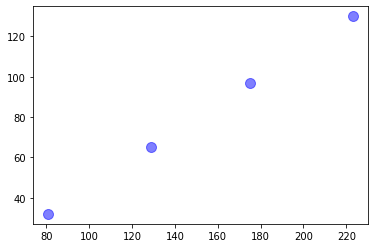

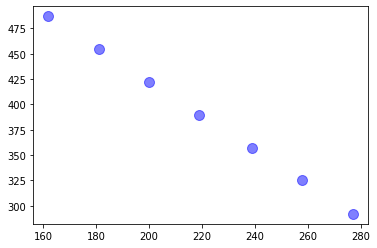

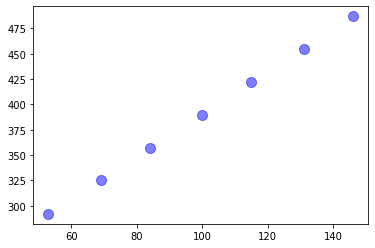

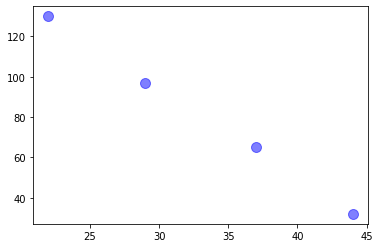

None None None None


In [68]:
print(graph_(s1), graph_(s2), graph_(s3), graph_(s4))

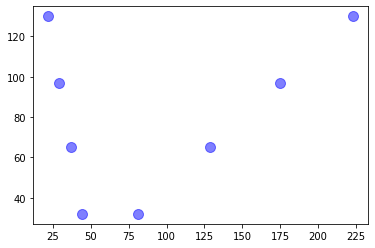

None


In [69]:
print(graph_(s4+s1))

In [70]:
    p1 = equation(s1, s2)
    p2 = equation(s2, s3)
    p3 = equation(s3, s4)
    p4 = equation(s4, s1)


    point_list = [p1, p2, p3, p4]

In [71]:
point_list

[array([202.26865672, 328.66350068]),
 array([503.2, 155.4]),
 array([199.95652174,   8.37285903]),
 array([ 9.8       , 48.70909091])]

In [72]:

all_points = [(result[0][0], result[0][1]),
             (result[1][0], result[1][1]),
             (result[2][0], result[2][1]),
             (result[3][0], result[3][1])]

all_points

all_points.append((points[0][0], points[0][1]))
all_points.append((points[1][0], points[1][1]))
all_points.append((points[2][0], points[2][1]))


NameError: name 'result' is not defined

In [5]:
import time

image_path = './test_images/img2.jpeg'

'''
img_cut_part
'''
img_cut_time = time.time()
result_dict = co.img_cut(image_path)
image_np = result_dict['image_np']
points = result_dict['points']
print("img_cut_time :", time.time() - img_cut_time)




'''
get_cordinate
'''
cordinate_time = time.time()
result = np.array(ed.cord_edge(image_np))
result = po.point_order(result)
print("cordinate_time :", time.time() - cordinate_time)



all_points = [(result[0][0], result[0][1]),
             (result[1][0], result[1][1]),
             (result[2][0], result[2][1]),
             (result[3][0], result[3][1])]

all_points

all_points.append((points[0][0], points[0][1]))
all_points.append((points[1][0], points[1][1]))
all_points.append((points[2][0], points[2][1]))


img_cut_time : 5.756520748138428
detected 2 lines
detected 2 lines
[array([202.26865672, 328.66350068]), array([503.2, 155.4]), array([199.95652174,   8.37285903]), array([ 9.8       , 48.70909091])]
cordinate_time : 0.5874001979827881


In [6]:
all_points

[(9.8, 48.709090909090904),
 (202.2686567164179, 328.66350067842603),
 (199.95652173913044, 8.372859025032941),
 (503.20000000000005, 155.39999999999998),
 (95, 198),
 (217, 362),
 (36, 234)]

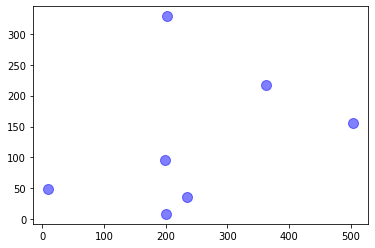

In [15]:


all_points = [(result[0][1], result[0][0]),
             (result[1][1], result[1][0]),
             (result[2][1], result[2][0]),
             (result[3][1], result[3][0])]


all_points.append((points[0][0], points[0][1]))
all_points.append((points[1][0], points[1][1]))
all_points.append((points[2][0], points[2][1]))

graph_(all_points)